In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
import seaborn as sns
sns.set()

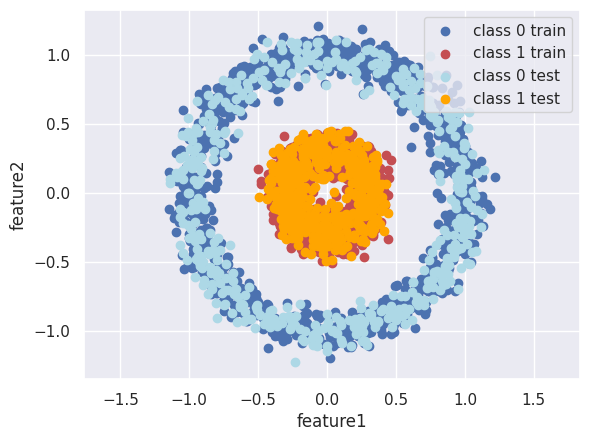

Shape of X_train set is 2 x 2000.
Shape of X_test set is 2 x 1000.
Shape of y_train set is 1 x 2000.
Shape of y_test set is 1 x 1000.


In [24]:
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
#X,y = make_moons(n_samples = 3000, noise = 0.08)
X0 = []
X1 = []
for i in range(len(y)):
    if y[i] == 0:
        X0.append(X[i,:])
    else:
        X1.append(X[i,:])

X0_np = np.array(X0)
X1_np = np.array(X1)

X0_train = X0_np[:1000,:].T # we want X to be made of examples which are stacked horizontally
X0_test = X0_np[1000:,:].T
X1_train = X1_np[:1000,:].T
X1_test = X1_np[1000:,:].T

X_train = np.hstack([X0_train,X1_train]) # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1
X_test = np.hstack([X0_test,X1_test]) # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# we will plot shapes of training and test set to make sure that they were made by stacking examoles horizontally
# so in every column of these matrices there is one examples
# in two rows there are features (feature1 is ploted on the x-axis, and feature2 is ploted on the y-axis)
print('Shape of X_train set is %i x %i.'%X_train.shape)
print('Shape of X_test set is %i x %i.'%X_test.shape)
# labels for these examples are in y_train and y_test
print('Shape of y_train set is %i x %i.'%y_train.shape)
print('Shape of y_test set is %i x %i.'%y_test.shape)


In [25]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [26]:
def relu(x):
    return x*(x>0)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [27]:
def forward_pass(X, parameters):

    # to make forward pass calculations we need W1 and W2 so we will extract them from dictionary parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']


    # first layer calculations - hidden layer calculations
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)  # activation in the first layer is tanh

    # output layer calculations
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)# A2 are predictions, y_hat

    # cache values for backpropagation calculations
    cache = {'Z1':Z1,
             'A1':A1,
             'Z2':Z2,
             'A2':A2
            }

    return A2, cache

In [28]:
def cost_calculation(A2,Y):

    m = Y.shape[1]
    cost = (- 1 / m) * np.sum(Y * np.log(A2) + (1 - Y) * (np.log(1 - A2)))  # compute cost
    return cost

In [29]:
def backward_pass(parameters, cache, X, Y):

    # unpack paramaeters and cache to get values for backpropagation calculations
    W1 = parameters['W1']
    W2 = parameters['W2']

    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']

    m = X.shape[1] # number of examples in a training set

    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)   # keepdims - prevents python to output rank 1 array (n,)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) # we use tanh activation function
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [30]:
def update_parameters(parameters, learning_rate, grads):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # updated parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [31]:
def NN_model(X,Y,n_h, num_iterations, learning_rate):

    n_x = X.shape[0] # size of an input layer = number of features
    n_y = Y.shape[0] # size of an output layer
    parameters = initialize_parameters(n_x, n_h, n_y)

    #unpack parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(num_iterations):
        A2, cache = forward_pass(X, parameters)
        cost  = cost_calculation(A2, Y)
        grads = backward_pass(parameters, cache, X, Y)
        parameters = update_parameters(parameters, learning_rate, grads)

    return parameters

In [32]:
def predict(parameters, X):

    A2, cache = forward_pass(X, parameters)
    predictions = np.round(A2)

    return predictions

In [33]:
num_iterations = 20000
learning_rate = 0.1
n_h = 4
parameters_final = NN_model(X_train,y_train,n_h, num_iterations, learning_rate)

In [34]:
Y_predictions_test = predict(parameters_final, X_test)
Y_predictions_train = predict(parameters_final, X_train)

In [35]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predictions_test - y_test)) * 100))

train accuracy: 99.95 %
test accuracy: 100.0 %


In [36]:
def plot_grid(parameters_final, X_set):
    x_min, x_max = X_set[0,:].min(), X_set[0,:].max()
    y_min, y_max = X_set[1,:].min(), X_set[1,:].max()


    xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),np.linspace(y_min, y_max,100))

    G = np.c_[xx.ravel(), yy.ravel()]
    D = G.T

    predictions = predict(parameters_final, D)
    predictions = predictions.reshape(10000,)

    #plt.contourf(np.c_[xx.ravel(), yy.ravel()][0], np.c_[xx.ravel(), yy.ravel()][1], D, cmap=plt.cm.Spectral)
    color = {'0':'gray',
             '1':'yellow'}
    predictions_colors = [color[str(int(predictions[i]))] for i in range(len(predictions))]

    plt.scatter(D[0,:],D[1,:], c=predictions_colors)




In [37]:
def plot_classified(X_set,Y_prediction,c_class0, c_class1, title_str, feature_1_str=''):

    # c_class0 is a string, a color for class 0; c_class1 is a string, a color for class 1

    colors_d = {'0' : c_class0,
                '1' : c_class1}

    colors = [colors_d[str(int(Y_prediction[0,i]))] for i in range(Y_prediction.shape[1]) ]
    c = np.array(colors)
    plt.scatter(X_set[0,:], X_set[1,:], color=c)
    plt.xlabel(feature_1_str)
    plt.title(title_str)
    plt.axis('equal')


In [38]:
def plot_original_set(X_set, y_label, c_class0, c_class1, title_str):

    colors_d = {'0' : c_class0,
                '1' : c_class1}

    colors = [colors_d[str(int(y_label[0,i]))] for i in range(y_label.shape[1]) ]
    c = np.array(colors)
    plt.scatter(X_set[0,:], X_set[1,:], color=c)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title(title_str)
    plt.axis('equal')



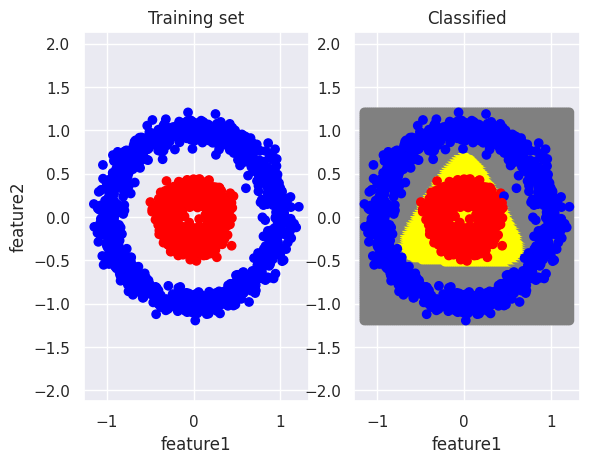

In [39]:
plt.subplot(1,2,1)
plot_original_set(X_train, y_train, 'Blue', 'Red', 'Training set')
plt.subplot(1,2,2)
plot_grid(parameters_final, X_train)
plot_classified(X_train, Y_predictions_train, 'Blue', 'Red', 'Classified', 'feature1' )
plt.show()

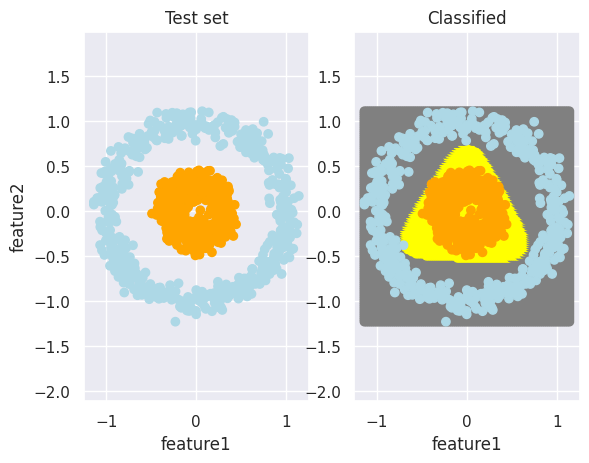

In [40]:
plt.subplot(1,2,1)
plot_original_set(X_test, y_test, 'LightBlue', 'Orange', 'Test set')
plt.subplot(1,2,2)
plot_grid(parameters_final, X_test)
plot_classified(X_test, Y_predictions_test, 'LightBlue', 'Orange', 'Classified', 'feature1' )
plt.show()

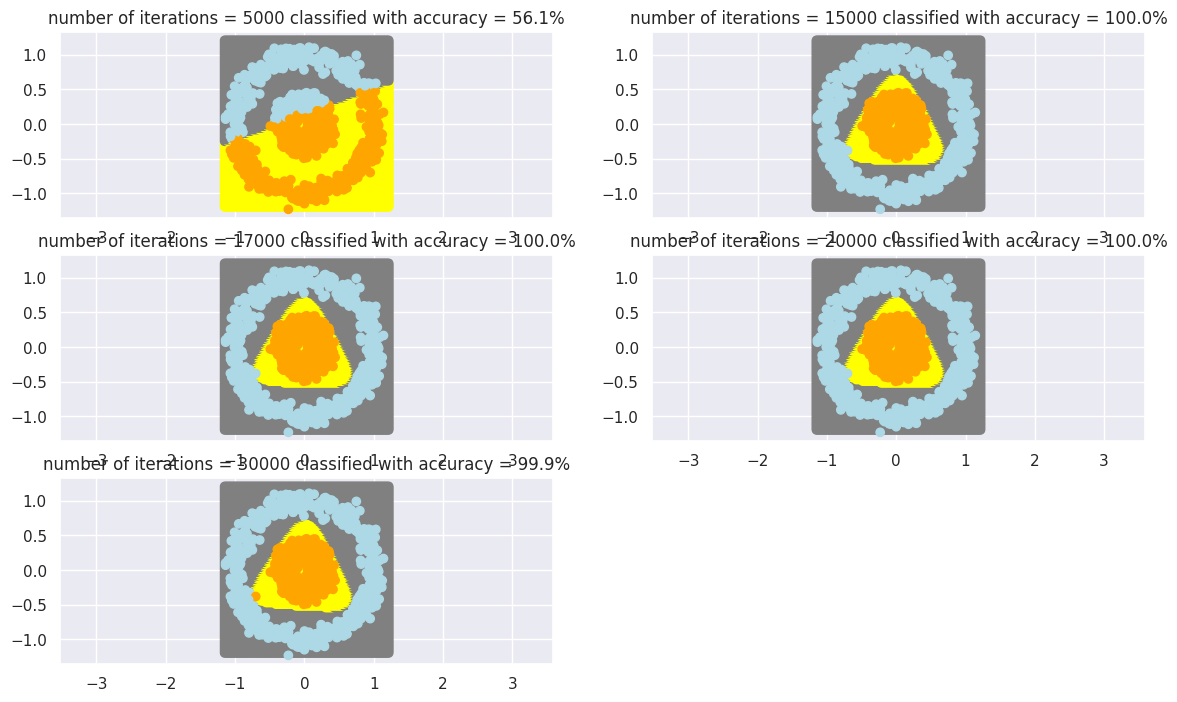

In [41]:
plt.figure(figsize=(14, 14))
num_iterations = [5000, 15000,17000, 20000, 30000]
for i, it in enumerate(num_iterations):
    plt.subplot(5, 2, i + 1)
    plt.title('Num of iterations %d' % it)
    learning_rate = 0.1
    n_h = 4
    parameters = NN_model(X_train,y_train,n_h, it, learning_rate)

    predictions = predict(parameters, X_test)
    accuracy = 100 - np.mean(np.abs(predictions - y_test)) * 100
    plot_grid(parameters, X_train)
    title_string = 'number of iterations = ' + str(it)+ ' classified with accuracy = ' + str(accuracy)+'%'
    plot_classified(X_test, predictions, 'LightBlue', 'Orange', title_string )


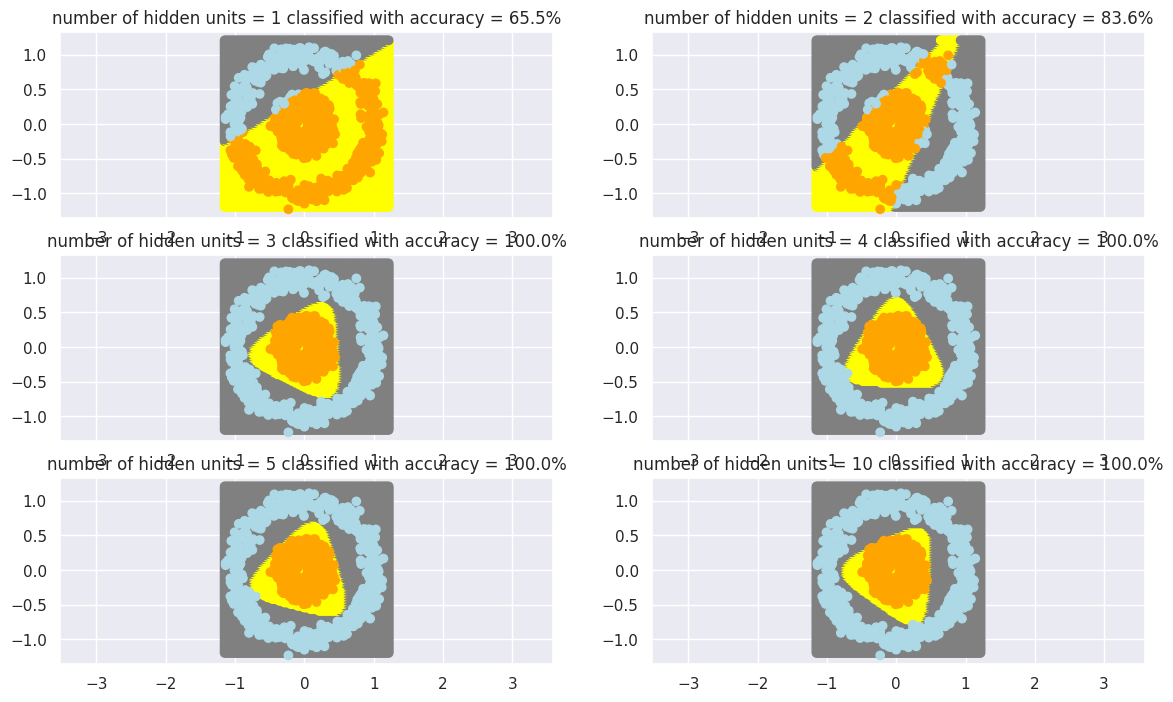

In [42]:
plt.figure(figsize=(14, 14))
n_h_l = [1, 2,3, 4, 5, 10]
num_it = 20000

for i, n_h in enumerate(n_h_l):
    plt.subplot(5, 2, i + 1)
    plt.title('Num of iterations %d' % it)
    learning_rate = 0.1
    parameters = NN_model(X_train,y_train,n_h, num_it, learning_rate)

    predictions = predict(parameters, X_test)
    accuracy = 100 - np.mean(np.abs(predictions - y_test)) * 100
    accuracy = round(accuracy,2)
    title_string = 'number of hidden units = '+str(n_h)+' classified with accuracy = ' + str(accuracy)+'%'
    plot_grid(parameters, X_train)
    plot_classified(X_test, predictions, 'LightBlue', 'Orange', title_string )

